In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

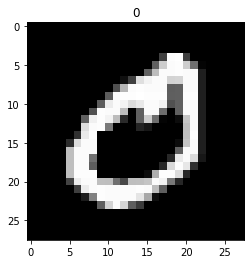

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[21], cmap='gray')
plt.title(y_train[21])

In [5]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
X_train /= 255
X_test /= 255

In [8]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [9]:
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 10, activation='softmax'))

In [10]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [11]:
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(X_train, y_train, epochs=20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4522 - accuracy: 0.8629 - val_loss: 0.1686 - val_accuracy: 0.9512
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2285 - accuracy: 0.9341 - val_loss: 0.1239 - val_accuracy: 0.9633
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1904 - accuracy: 0.9450 - val_loss: 0.1158 - val_accuracy: 0.9656
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1668 - accuracy: 0.9522 - val_loss: 0.1122 - val_accuracy: 0.9678
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1508 - accuracy: 0.9560 - val_loss: 0.1097 - val_accuracy: 0.9686
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1409 - accuracy: 0.9587 - val_loss: 0.1087 - val_accuracy: 0.9703
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1328 - accuracy: 0.9615 - val_loss: 0.0990 - val_accuracy:

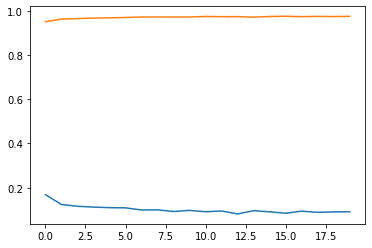

In [13]:
historico.history.keys()

plt.plot(historico.history['val_loss'])

plt.plot(historico.history['val_accuracy'])

In [14]:
previsoes = modelo.predict(X_test)
previsoes

array([[4.8697275e-12, 3.9752199e-06, 9.7378925e-06, ..., 9.9991798e-01,
        1.4264327e-08, 5.6845194e-05],
       [1.5222801e-07, 2.6741154e-06, 9.9999154e-01, ..., 1.1755021e-06,
        3.4709011e-08, 5.1208703e-12],
       [4.5131855e-15, 9.9999940e-01, 3.3216747e-08, ..., 7.6421081e-08,
        3.9005999e-07, 2.5315278e-11],
       ...,
       [7.1925617e-09, 3.5428815e-09, 1.3750380e-06, ..., 1.8093961e-05,
        3.1516713e-08, 3.0737505e-05],
       [4.4104209e-16, 3.5272389e-11, 6.1166232e-19, ..., 1.3963274e-18,
        1.7481817e-12, 6.4322401e-14],
       [2.3061246e-13, 5.9905595e-21, 5.8079308e-14, ..., 1.6736976e-27,
        8.6466927e-15, 4.7189264e-17]], dtype=float32)

In [15]:
y_test_matrix = [np.argmax(t) for t in y_test]
y_previsoes_matrix = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_test_matrix, y_previsoes_matrix)
confusao

array([[ 968,    1,    1,    0,    1,    2,    4,    2,    1,    0],
       [   0, 1125,    2,    2,    0,    0,    2,    0,    4,    0],
       [   5,    2, 1004,    2,    2,    1,    2,    5,    9,    0],
       [   0,    0,    3,  991,    0,    6,    0,    4,    2,    4],
       [   1,    0,    3,    0,  957,    0,    5,    2,    1,   13],
       [   3,    0,    0,    8,    2,  866,    8,    1,    3,    1],
       [   5,    3,    0,    0,    4,    3,  942,    0,    1,    0],
       [   1,    4,   10,    2,    3,    0,    0,  997,    1,   10],
       [   6,    3,    3,    5,    3,    8,    1,    5,  937,    3],
       [   3,    2,    0,   10,    9,    7,    0,    6,    3,  969]],
      dtype=int64)

In [16]:
y_train[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
novo = X_train[20]

novo = np.expand_dims(novo, axis = 0)

pred = modelo.predict(novo)

pred = [np.argmax(pred) for t in pred]

pred

[4]